In [8]:
import os

#Import required libraries:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from typing import Tuple

In [11]:
# Define plotting functions:
def create_plot(
    x : np.ndarray, 
    y, 
    label : str, 
    ax, 
    xlabel : str, 
    ylabel : str, 
    xlim : Tuple, 
    ylim : Tuple, 
    color : str):
    
    """
    Creates a 2D plot.
    
    Parameters
    ----------
    x : np.ndarray
        X values.
    y : function
        The function to apply to the x values.
    label : str
        Label for the plot.
    ax : matplotlib.axes._subplots.AxesSubplot
        The subplot object.
    xlabel : str
        X label.
    ylabel : str
        Y label.
    xlim : Tuple
        X axis limit.
    ylim : Tuple
        Y axis limit.
    color : str
        Color for the plot.
    """
    ax.plot(x, y(x), color=color, alpha=0.5, linewidth=3, label = label)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.legend()

def create_3d_plot(x, y, z, label, ax, xlabel, ylabel, zlabel, color):
    """
    Creates a 3D plot.
    
    Parameters
    ----------
    x : np.ndarray
        X values.
    y : np.ndarray
        Y values.
    z : np.ndarray
        Z values calculated as per function.
    label : str
        Label for the plot.
    ax : matplotlib.axes._subplots.Axes3DSubplot
        The subplot object.
    xlabel : str
        X label.
    ylabel : str
        Y label.
    zlabel : str
        Z label.
    color : str
        Color for the plot.
    """
    surf = ax.plot_surface(x, y, z, color=color, alpha=0.5, label=label)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.invert_yaxis()
    ax.set_zlabel(zlabel)
    ax.view_init(elev=25, azim=-60)  # Set the viewing angle
    surf._facecolors2d = surf._facecolor3d
    surf._edgecolors2d = surf._edgecolor3d
    ax.legend()

In [7]:
# Define activation functions
def linear(x):
    return x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * x)

def elu(x, alpha=1):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [8]:
# Generate x-axis:
x = np.linspace(-6, 6, 100)

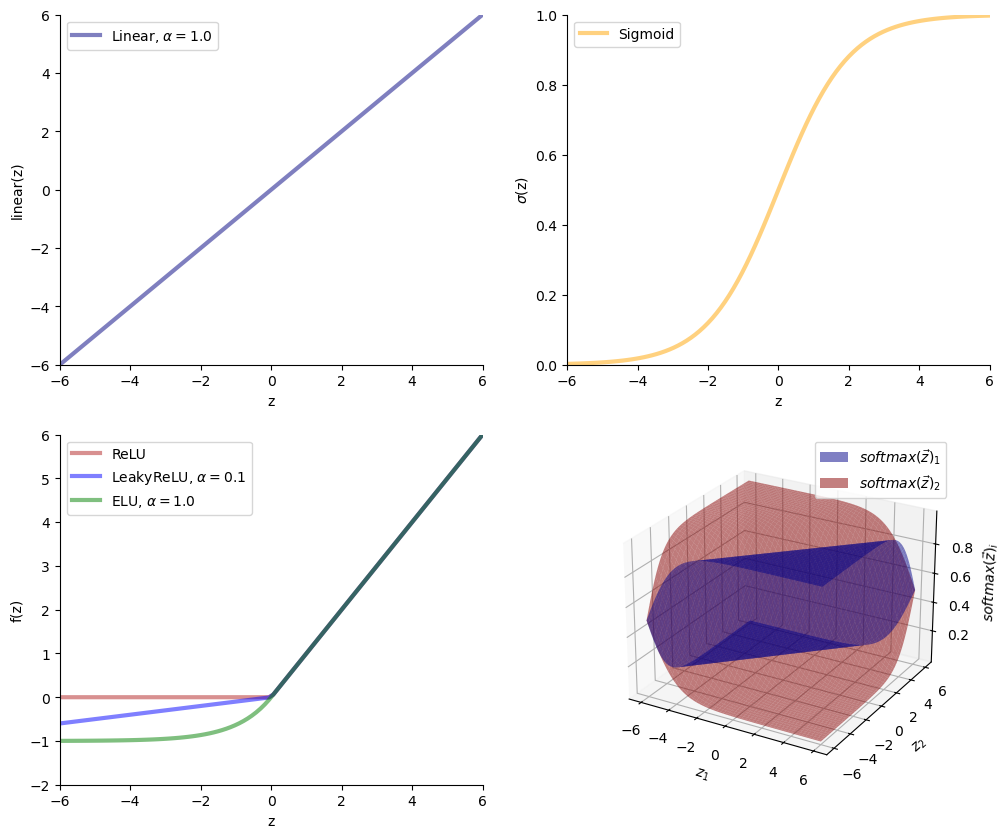

<Figure size 640x480 with 0 Axes>

In [9]:
# Create figure
fig = plt.figure(figsize=(12, 10))

# Create each subplot
create_plot(
    x, 
    linear, 
    r"Linear, $\alpha = 1.0$", 
    fig.add_subplot(2, 2, 1), 
    'z', 'linear(z)', 
    [-6, 6], 
    [-6, 6], 
    "navy"
)

create_plot(
    x, 
    sigmoid, 
    "Sigmoid", 
    fig.add_subplot(2, 2, 2), 
    'z', 
    '$\sigma$(z)', 
    [-6, 6], 
    [0, 1], 
    "orange"
)

ax3 = fig.add_subplot(2, 2, 3)
create_plot(
    x, 
    relu, 
    "ReLU", 
    ax3, 
    'z', 
    'f(z)', 
    [-6, 6], 
    [-2, 6], 
    "firebrick"
)
create_plot(
    x, 
    lambda x: leaky_relu(x, alpha=0.1), 
    r"LeakyReLU, $\alpha = 0.1$", 
    ax3, 
    'z', 
    'f(z)', 
    [-6, 6], 
    [-2, 6], 
    "blue"
)
create_plot(
    x, 
    elu, 
    r"ELU, $\alpha = 1.0$", 
    ax3, 'z', 
    'f(z)', 
    [-6, 6], 
    [-2, 6], 
    "green"
)

_x = np.linspace(-6, 6, 100)
_y = np.linspace(-6, 6, 100)[::-1]
_xv, _yv = np.meshgrid(_x, _y)

# Compute softmax for each point on the grid
_z1 = np.array([softmax(np.array([x,y]))[0] for x, y in \
                zip(np.ravel(_xv), np.ravel(_yv))])
_z2 = np.array([softmax(np.array([x,y]))[1] for x, y in \
                zip(np.ravel(_xv), np.ravel(_yv))])
_z1 = _z1.reshape(_xv.shape)
_z2 = _z2.reshape(_yv.shape)

ax4 = fig.add_subplot(2, 2, 4, projection='3d')
create_3d_plot(
    _xv, 
    _yv, 
    _z1, 
    r"$ softmax(\vec{z})_1 $", 
    ax4, 
    '$z_{1}$', 
    '$z_{2}$', 
    r'$ softmax(\vec{z})_i $', 
    'b'
)
create_3d_plot(
    _xv, 
    _yv, 
    _z2, 
    r"$ softmax(\vec{z})_2 $", 
    ax4, '$z_{1}$', 
    '$z_{2}$', 
    r'$ softmax(\vec{z})_i $', 
    'r'
)

plt.show()
plt.savefig("./figures/03_activation_functions.png")